# Coarse Tuning
### Convolutional Neural Network


Follows the method laid out in: [Machine learning techniques for state recognition and auto-tuning in quantum dots](https://www.nature.com/articles/s41534-018-0118-7).

# Import Modules


In [10]:
import os
import sys
%matplotlib inline

os.chdir("/Users/andrijapaurevic/Documents/UWaterloo/Research/mainCSG/QuantumDotControl")

from autotuning.coarse_tuning.data.process_data import *
from autotuning.coarse_tuning.models.cnn.noiseless_cnn_model import *

# Load Data

In [11]:
raw_data_path = os.path.join(os.getcwd(), "data/raw")
processed_data_path = "/Users/andrijapaurevic/Documents/UWaterloo/Research/mainCSG/QuantumDotControl/data/processed"

tile_size = 10
dataset_size = 1000
train_val_split = 0.9
batch_size = 64

process_data(raw_data_path, processed_data_path, tile_size, train_val_split, dataset_size)
dataloader_P1, dataloader_P2, voltages = prepare_train_data_for_torch(processed_data_path, batch_size, tiled=True)

File 0/1000 completed ... 

File 500/1000 completed ... 

File 1000/1000 completed ... 



# Train Model

In [12]:
raw_data_path = os.path.join(os.getcwd(), "data/raw")
processed_data_path = "/Users/andrijapaurevic/Documents/UWaterloo/Research/mainCSG/QuantumDotControl/data/processed"

tile_size = 10
dataset_size = 1000
train_val_split = 0.9
batch_size = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

# Number of Classes = 4 (0-2 QD, -1 Short)
model = CoarseTuningCNN(image_size=100, num_classes=4).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=3.45e-4)
criterion = torch.nn.BCEWithLogitsLoss()

trained_model_save_path = os.path.join(os.getcwd(), f'autotuning/coarse_tuning/models/cnn/noiseless_cnn_model_TRAINED_TILESIZE{tile_size}_DATASETSIZE{dataset_size}.pth')

if not os.path.exists(trained_model_save_path):     
    epochs = 20
    for epoch in range(1, epochs + 1):
        if epoch % 5 == 0:
            print(f"Epoch #{epoch}")
            model.backprop(model, device, dataloader_P1, optimizer, criterion)

    torch.save(model.state_dict(),trained_model_save_path)

# Prediction Model

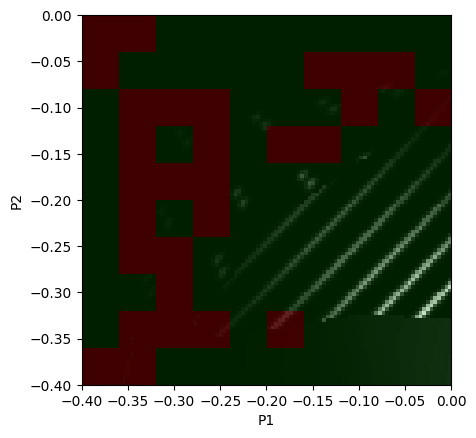


Test set: Average loss: -0.7807, Accuracy: 6924/10000 (69%), Standard Deviation: 13



In [13]:
# tile_size = 25
# dataset_size = 10
# train_val_split = 0.9
# batch_size = 64

# raw_data_path = os.path.join(os.getcwd(), "data/raw")
# processed_data_path = "/Users/andrijapaurevic/Documents/UWaterloo/Research/mainCSG/QuantumDotControl/data/processed"
# trained_model_save_path = os.path.join(os.getcwd(), f'autotuning/coarse_tuning/models/cnn/noiseless_cnn_model_TRAINED_TILESIZE{tile_size}_DATASETSIZE{dataset_size}.pth')


device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

model = CoarseTuningCNN(image_size=100, num_classes=4).to(device)
model.load_state_dict(torch.load(trained_model_save_path))

dataloader_P1, dataloader_P2, voltages = prepare_val_data_for_torch(processed_data_path,tiled=True)
model.test(model, device, dataloader_P1, criterion, voltages, tile_size=tile_size)